# WeatherPy

---

## Solution

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import random
from scipy.stats import linregress
from scipy import stats

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    
    # Get latitude, longitude from the DataFrame
    lat = []
    lon = []
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ", "+")
    
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
    
    
    # Run an API request for each of the cities
    try:
    # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
    
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

        
    # If an error is experienced, skip the city
    except (KeyError, IndexError):
        print("City not found. Skipping...")
        pass

              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | khandyga
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | hami
Processing Record 4 of Set 1 | coyhaique
Processing Record 5 of Set 1 | mejit
Processing Record 6 of Set 1 | alice springs
Processing Record 7 of Set 1 | stanley
Processing Record 8 of Set 1 | puerto natales
Processing Record 9 of Set 1 | leua
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | waitangi
Processing Record 12 of Set 1 | juneau
Processing Record 13 of Set 1 | longyearbyen
Processing Record 14 of Set 1 | adamstown
Processing Record 15 of Set 1 | blackmans bay
Processing Record 16 of Set 1 | selfoss
Processing Record 17 of Set 1 | colonia
Processing Record 18 of Set 1 | kentville
Processing Record 19 of Set 1 | yellowknife
Processing Record 20 of Set 1 | sitka
Processing Record 21 of Set 1 | ribeira grande
Processing Record 22 of Set 1 | taiohae
City not found. Skipping...


Processing Record 42 of Set 4 | anna regina
Processing Record 43 of Set 4 | chonchi
Processing Record 44 of Set 4 | hawaiian paradise park
Processing Record 45 of Set 4 | trevelin
Processing Record 46 of Set 4 | veraval
Processing Record 47 of Set 4 | alofi
Processing Record 48 of Set 4 | oum hadjer
Processing Record 49 of Set 4 | preobrazheniye
Processing Record 0 of Set 5 | sittwe
Processing Record 1 of Set 5 | mo i rana
Processing Record 2 of Set 5 | maintirano
Processing Record 3 of Set 5 | 'ohonua
City not found. Skipping...
Processing Record 4 of Set 5 | anqiu
Processing Record 5 of Set 5 | praia da vitoria
Processing Record 6 of Set 5 | talcahuano
Processing Record 7 of Set 5 | ulsteinvik
Processing Record 8 of Set 5 | tauste
Processing Record 9 of Set 5 | villa gesell
Processing Record 10 of Set 5 | polyarnyy
Processing Record 11 of Set 5 | la passe
Processing Record 12 of Set 5 | punta arenas
Processing Record 13 of Set 5 | cooper's town
Processing Record 14 of Set 5 | motueka

Processing Record 34 of Set 8 | tralee
Processing Record 35 of Set 8 | east london
Processing Record 36 of Set 8 | san rafael
Processing Record 37 of Set 8 | aegina
Processing Record 38 of Set 8 | neiafu
Processing Record 39 of Set 8 | bayan nur
City not found. Skipping...
Processing Record 40 of Set 8 | hagenbach
Processing Record 41 of Set 8 | meadow lakes
Processing Record 42 of Set 8 | evanston
Processing Record 43 of Set 8 | port douglas
Processing Record 44 of Set 8 | arhribs
Processing Record 45 of Set 8 | kourou
Processing Record 46 of Set 8 | bikenibeu village
Processing Record 47 of Set 8 | saravia
Processing Record 48 of Set 8 | olinda
Processing Record 49 of Set 8 | camacupa
Processing Record 0 of Set 9 | palmer
Processing Record 1 of Set 9 | basco
Processing Record 2 of Set 9 | correntina
Processing Record 3 of Set 9 | nogliki
Processing Record 4 of Set 9 | pokhara
Processing Record 5 of Set 9 | toliara
Processing Record 6 of Set 9 | inari
Processing Record 7 of Set 9 | co

Processing Record 22 of Set 12 | abnub
Processing Record 23 of Set 12 | as sulayyil
Processing Record 24 of Set 12 | igrim
Processing Record 25 of Set 12 | peterhead
Processing Record 26 of Set 12 | pavlohrad
Processing Record 27 of Set 12 | berezanskaya
Processing Record 28 of Set 12 | weinan
Processing Record 29 of Set 12 | mezgor'e
City not found. Skipping...
Processing Record 30 of Set 12 | fomboni
Processing Record 31 of Set 12 | piti village
Processing Record 32 of Set 12 | taulaga
Processing Record 33 of Set 12 | rufino
Processing Record 34 of Set 12 | arys
Processing Record 35 of Set 12 | bereeda
Processing Record 36 of Set 12 | abraham's bay
City not found. Skipping...
Processing Record 37 of Set 12 | guerrero negro
Processing Record 38 of Set 12 | sangueya
Processing Record 39 of Set 12 | al muwayh
Processing Record 40 of Set 12 | tshabong
Processing Record 41 of Set 12 | as saffaniyah
Processing Record 42 of Set 12 | al bayda'
Processing Record 43 of Set 12 | juva
Processing

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,khandyga,62.6667,135.6000,-24.08,99,100,0.68,RU,1699858744
1,albany,42.6001,-73.9662,-3.48,83,9,0.88,US,1699858473
2,hami,42.8000,93.4500,8.62,20,5,0.99,CN,1699858745
3,coyhaique,-45.5752,-72.0662,7.97,66,100,2.57,CL,1699858745
4,mejit,10.2753,170.8646,28.02,84,70,8.60,MH,1699858745


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,khandyga,62.6667,135.6000,-24.08,99,100,0.68,RU,1699858744
1,albany,42.6001,-73.9662,-3.48,83,9,0.88,US,1699858473
2,hami,42.8000,93.4500,8.62,20,5,0.99,CN,1699858745
3,coyhaique,-45.5752,-72.0662,7.97,66,100,2.57,CL,1699858745
4,mejit,10.2753,170.8646,28.02,84,70,8.60,MH,1699858745


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

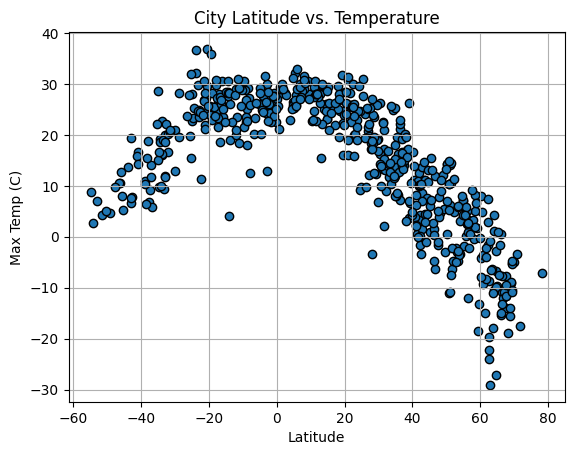

In [8]:
# Build scatter plot for latitude vs. temperature
x_limit = 100
plt.scatter(x=city_data_df['Lat'], y=city_data_df['Max Temp'], edgecolors="black")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

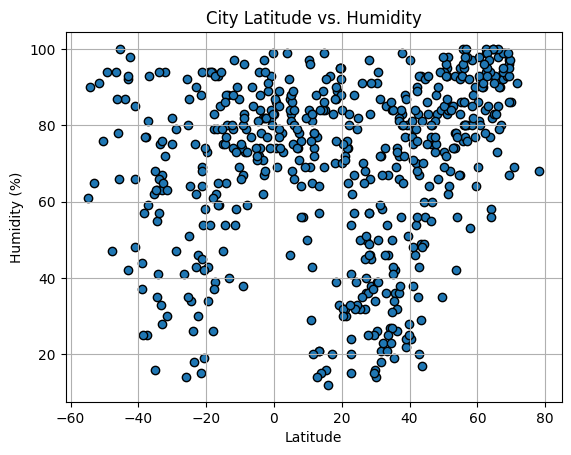

In [9]:
# Build the scatter plots for latitude vs. humidity
x_limit = 100
plt.scatter(x=city_data_df['Lat'], y=city_data_df['Humidity'], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

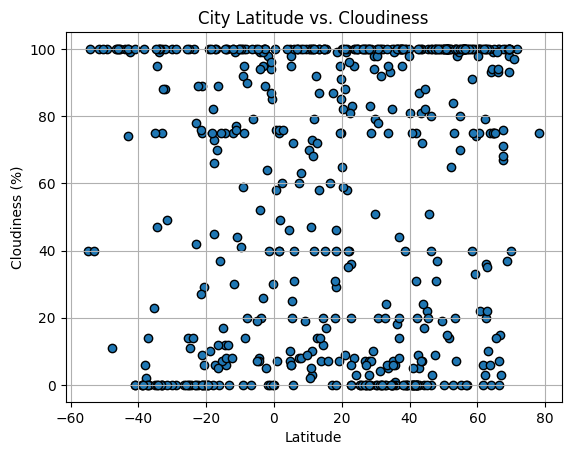

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x_limit = 100
plt.scatter(x=city_data_df['Lat'], y=city_data_df['Cloudiness'], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

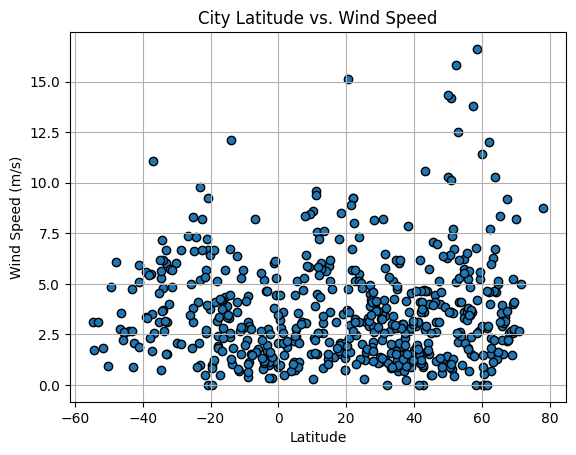

In [11]:
# Build the scatter plots for latitude vs. wind speed
x_limit = 100
plt.scatter(x=city_data_df['Lat'], y=city_data_df['Wind Speed'], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
#"City Latitude vs. Temperature"

In [12]:
# Define a function to create Linear Regression plots
x_values = city_data_df['Lat']
y_values1 = city_data_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values1)

regress_values1 = x_values * slope + intercept
print(regress_values1)

City_ID
0       3.687197
1       8.787395
2       8.736588
3      31.198339
4      17.003180
         ...    
572    16.857900
573     9.494834
574    19.175490
575    25.114961
576    17.898344
Name: Lat, Length: 577, dtype: float64


In [13]:
line_eq1 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq1)

y = -0.25x + 19.61


The r-value is: 0.4049505122859745


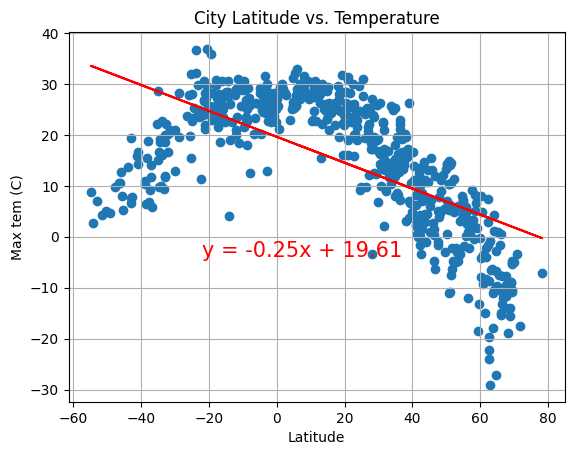

In [16]:
plt.scatter(x_values,y_values1)
plt.plot(x_values,regress_values1,"r-")

# Label plot and annotate the line equation
plt.title("City Latitude vs. Temperature")
plt.xlabel('Latitude')
plt.ylabel('Max tem (C)')
plt.annotate(line_eq1,(-22,-4),fontsize=15,color="red")
plt.grid(True)

# Print r value
print(f"The r-value is: {rvalue**2}")


# Save the figure
plt.savefig("output_data/Fig1_1.png")

# Show plot
plt.show()

In [ ]:
#"City Latitude vs. Humidity"

In [17]:
# Define a function to create Linear Regression plots

y_values2 = city_data_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values2)

regress_values2 = x_values * slope + intercept
print(regress_values2)

City_ID
0      74.701235
1      72.318996
2      72.342728
3      61.851123
4      68.481505
         ...    
572    68.549364
573    71.988561
574    67.466846
575    64.692593
576    68.063385
Name: Lat, Length: 577, dtype: float64


In [18]:
line_eq2 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq2)

y = 0.12x + 67.26


The r-value is: 0.04017975125261763


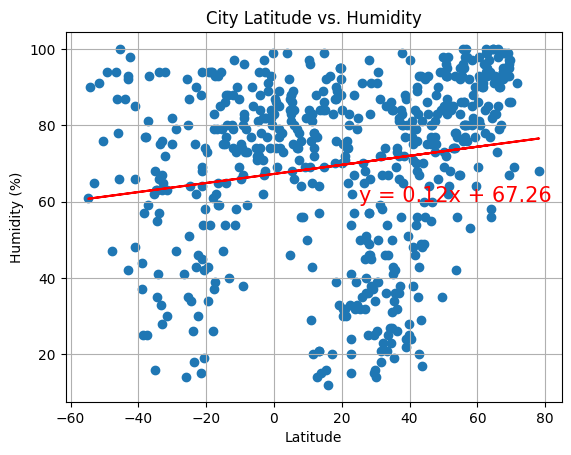

In [90]:
plt.scatter(x_values,y_values2)
plt.plot(x_values,regress_values2,"r-")

# Label plot and annotate the line equation
plt.title("City Latitude vs. Humidity")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq2,(25,60),fontsize=15,color="red")
plt.grid(True)

# Print r value
print(f"The r-value is: {rvalue**2}")


# Save the figure
plt.savefig("output_data/Fig2_1.png")

# Show plot
plt.show()

In [ ]:
#"City Latitude vs. Cloudiness"

In [20]:
# Define a function to create Linear Regression plots

y_values3 = city_data_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values3)

regress_values3 = x_values * slope + intercept
print(regress_values3)

City_ID
0      64.061187
1      60.669654
2      60.703439
3      45.766805
4      55.206314
         ...    
572    55.302922
573    60.199220
574    53.761770
575    49.812135
576    54.611047
Name: Lat, Length: 577, dtype: float64


In [21]:
line_eq3 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq3)

y = 0.17x + 53.47


The r-value is: 0.04017975125261763


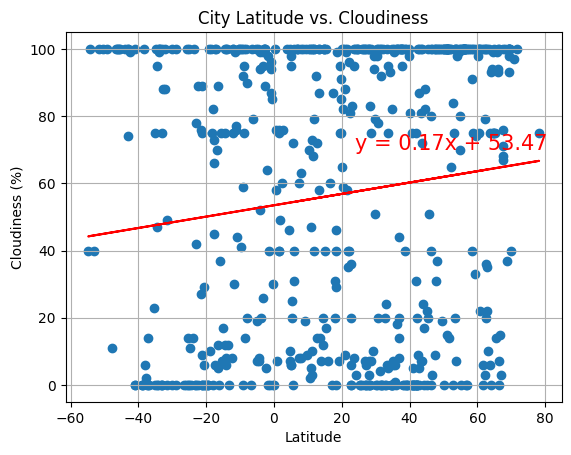

In [86]:
plt.scatter(x_values,y_values3)
plt.plot(x_values,regress_values3,"r-")

# Label plot and annotate the line equation
plt.title("City Latitude vs. Cloudiness")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq3,(24,70),fontsize=15,color="red")
plt.grid(True)

# Print r value
print(f"The r-value is: {rvalue**2}")


# Save the figure
plt.savefig("output_data/Fig3_1.png")

# Show plot
plt.show()

In [ ]:
#"City Latitude vs. Wind Speed"

In [23]:
# Define a function to create Linear Regression plots

y_values4 = city_data_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values4)

regress_values4 = x_values * slope + intercept
print(regress_values4)

City_ID
0      3.686552
1      3.643184
2      3.643616
3      3.452618
4      3.573323
         ...   
572    3.574558
573    3.637168
574    3.554851
575    3.504347
576    3.565711
Name: Lat, Length: 577, dtype: float64


In [24]:
line_eq4 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq4)

y = 0.0x + 3.55


The r-value is: 0.04017975125261763


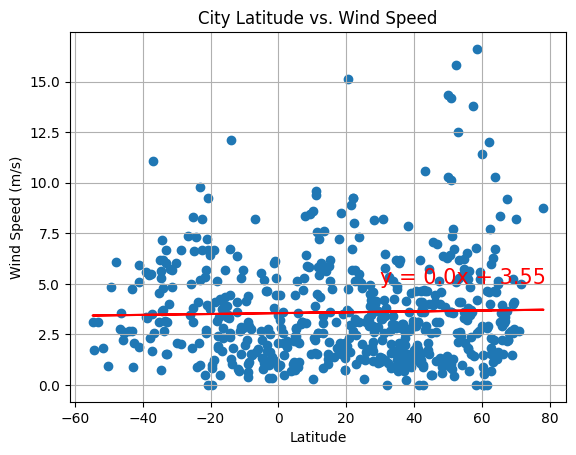

In [83]:
plt.scatter(x_values,y_values4)
plt.plot(x_values,regress_values4,"r-")

# Label plot and annotate the line equation
plt.title("City Latitude vs. Wind Speed")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.annotate(line_eq4,(30,5),fontsize=15,color="red")
plt.grid(True)

# Print r value
print(f"The r-value is: {rvalue**2}")


# Save the figure
plt.savefig("output_data/Fig4_1.png")

# Show plot
plt.show()

In [26]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,khandyga,62.6667,135.6000,-24.08,99,100,0.68,RU,1699858744
1,albany,42.6001,-73.9662,-3.48,83,9,0.88,US,1699858473
2,hami,42.8000,93.4500,8.62,20,5,0.99,CN,1699858745
4,mejit,10.2753,170.8646,28.02,84,70,8.60,MH,1699858745
6,stanley,54.8680,-1.6985,7.09,95,100,3.60,GB,1699858745


In [27]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,coyhaique,-45.5752,-72.0662,7.97,66,100,2.57,CL,1699858745
5,alice springs,-23.7000,133.8833,36.75,18,100,4.12,AU,1699858745
7,puerto natales,-51.7236,-72.4875,4.26,91,100,1.82,CL,1699858463
9,port-aux-francais,-49.3500,70.2167,4.58,94,100,4.86,TF,1699858746
10,waitangi,-43.9535,-176.5597,13.79,87,100,2.68,NZ,1699858746


###  Temperature vs. Latitude Linear Regression Plot

In [28]:
# Linear regression on Northern Hemisphere
x_values_n = northern_hemi_df['Lat']
y_values_n = northern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_n, y_values_n)

regress_values_n = x_values_n * slope + intercept
print(regress_values_n)

City_ID
0      -4.289887
1       8.167502
2       8.043403
4      28.234807
6       0.551563
         ...    
569     2.907135
572    27.879957
573     9.895443
574    33.540741
576    30.421272
Name: Lat, Length: 401, dtype: float64


In [29]:
line_eq_n = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq_n)

y = -0.62x + 34.61


The r-value is: 0.7916046652123276


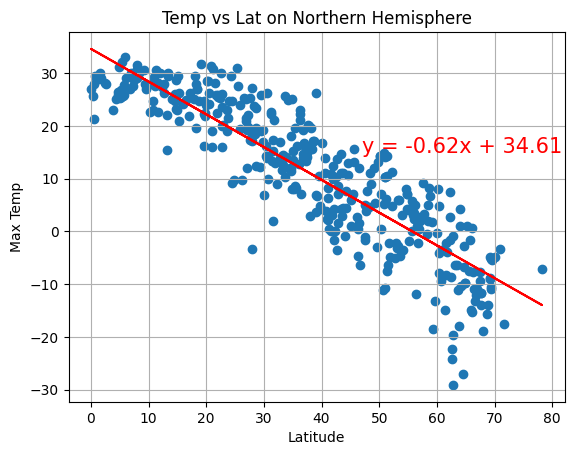

In [30]:
plt.scatter(x_values_n,y_values_n)
plt.plot(x_values_n,regress_values_n,"r-")

# Label plot and annotate the line equation
plt.title("Temp vs Lat on Northern Hemisphere")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq_n,(47,15),fontsize=15,color="red")
plt.grid(True)

# Print r value
print(f"The r-value is: {rvalue**2}")


# Save the figure
plt.savefig("output_data/Fig5.png")

# Show plot
plt.show()

In [31]:
# Linear regression on Southern Hemisphere
x_values_s = southern_hemi_df['Lat']
y_values_s = southern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_s, y_values_s)

regress_values_s = x_values_s * slope + intercept
print(regress_values_s)

City_ID
3      12.747358
5      20.808137
7      10.481738
9      11.356384
10     13.344937
         ...    
559    16.913831
565    19.942187
570    15.554031
571    25.457257
575    21.567115
Name: Lat, Length: 176, dtype: float64


In [32]:
line_eq_s = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq_s)

y = 0.37x + 29.54


The r-value is: 0.04017975125261763


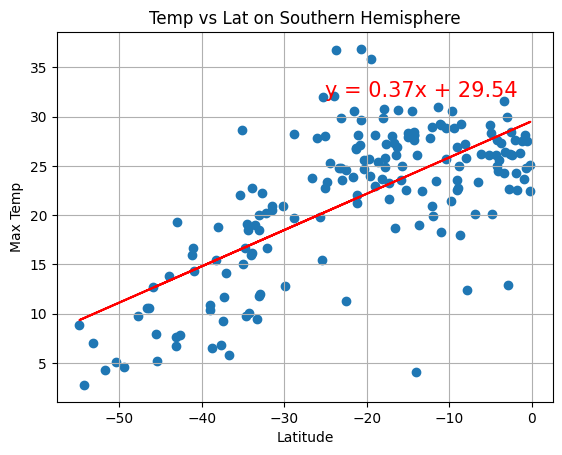

In [78]:
plt.scatter(x_values_s,y_values_s)
plt.plot(x_values_s,regress_values_s,"r-")

# Label plot and annotate the line equation
plt.title("Temp vs Lat on Southern Hemisphere")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq_s,(-25,32),fontsize=15,color="red")
plt.grid(True)

# Print r value
print(f"The r-value is: {rvalue**2}")


# Save the figure
plt.savefig("output_data/Fig6.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** Both regressions, Nothern and Southern, show that tempreture rises when latitude is closer to (equator), and drops as latitude moves away from the equator.

### Humidity vs. Latitude Linear Regression Plot

In [34]:
# Northern Hemisphere

y_values_nh = northern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_n, y_values_nh)

regress_values_nh = x_values_n * slope + intercept
print(regress_values_nh)

City_ID
0      78.957507
1      71.859185
2      71.929897
4      60.424670
6      76.198809
         ...    
569    74.856585
572    60.626866
573    70.874590
574    57.401305
576    59.178804
Name: Lat, Length: 401, dtype: float64


In [35]:
line_eq_nh = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq_nh)

y = 0.35x + 56.79


The r-value is: 0.028984694539965484


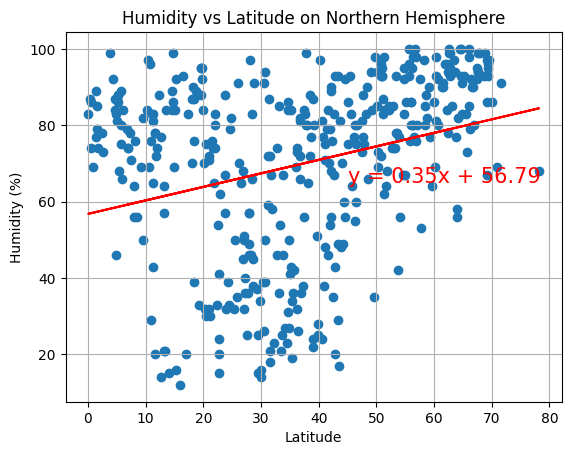

In [123]:
plt.scatter(x_values_n,y_values_nh)
plt.plot(x_values_n,regress_values_nh,"r-")

# Label plot and annotate the line equation
plt.title("Humidity vs Latitude on Northern Hemisphere")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq_nh,(45,65),fontsize=15,color="red")
plt.grid(True)

# Print r value
print(f"The r-value is: {rvalue**2}")


# Save the figure
plt.savefig("output_data/Fig7.png")

# Show plot
plt.show()

In [37]:
# Southern Hemisphere

y_values_sh = southern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_s, y_values_sh)

regress_values_sh = x_values_s * slope + intercept
print(regress_values_sh)

City_ID
3      61.583604
5      68.065424
7      59.761778
9      60.465097
10     62.064129
         ...    
559    64.933941
565    67.369097
570    63.840501
571    71.803866
575    68.675731
Name: Lat, Length: 176, dtype: float64


In [38]:
line_eq_sh = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq_sh)

y = 0.3x + 75.09


The r-value is: 0.028984694539965484


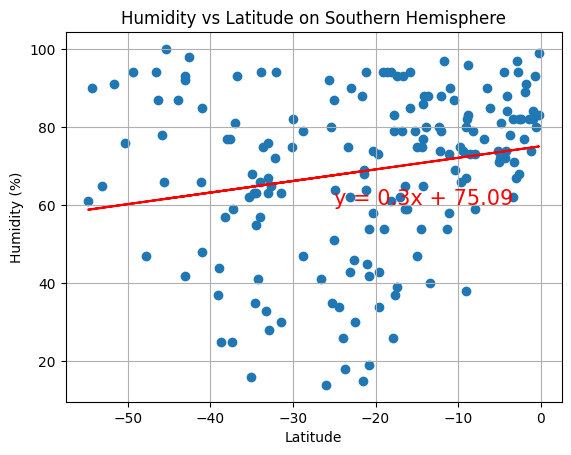

In [124]:
plt.scatter(x_values_s,y_values_sh)
plt.plot(x_values_s,regress_values_sh,"r-")

# Label plot and annotate the line equation
plt.title("Humidity vs Latitude on Southern Hemisphere")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq_sh,(-25,60),fontsize=15,color="red")
plt.grid(True)

# Print r value
print(f"The r-value is: {rvalue**2}")


# Save the figure
plt.savefig("output_data/Fig8.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** Humidity has tendency to increase in Southern hemisphere when moving towards the equator. And decrease for Norther hemisphere moving towards the equator.. 

### Cloudiness vs. Latitude Linear Regression Plot

In [40]:
# Northern Hemisphere

y_values_nc = northern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_n, y_values_nc)

regress_values_nc = x_values_n * slope + intercept
print(regress_values_nc)

City_ID
0      67.587515
1      60.698340
2      60.766969
4      49.600735
6      64.910100
         ...    
569    63.607424
572    49.796974
573    59.742756
574    46.666452
576    48.391578
Name: Lat, Length: 401, dtype: float64


In [41]:
line_eq_nc = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq_nc)

y = 0.34x + 46.07


The r-value is: 0.025378632901051593


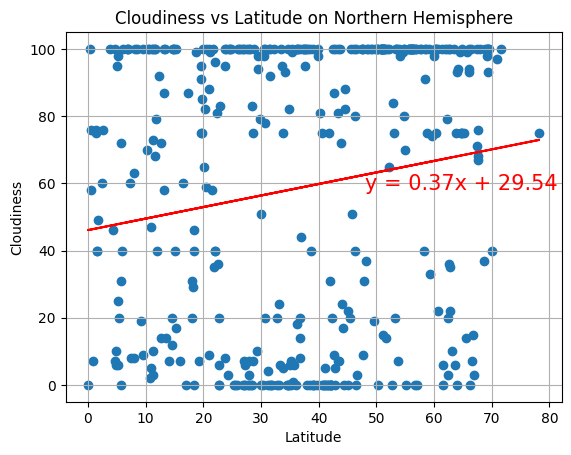

In [45]:
plt.scatter(x_values_n,y_values_nc)
plt.plot(x_values_n,regress_values_nc,"r-")

# Label plot and annotate the line equation
plt.title("Cloudiness vs Latitude on Northern Hemisphere")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq_s,(48,58),fontsize=15,color="red")
plt.grid(True)

# Print r value
print(f"The r-value is: {rvalue**2}")


# Save the figure
plt.savefig("output_data/Fig9.png")

# Show plot
plt.show()

In [46]:
# Southern Hemisphere

y_values_sc = southern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_s, y_values_sc)

regress_values_sc = x_values_s * slope + intercept
print(regress_values_sc)

City_ID
3      61.583604
5      68.065424
7      59.761778
9      60.465097
10     62.064129
         ...    
559    64.933941
565    67.369097
570    63.840501
571    71.803866
575    68.675731
Name: Lat, Length: 176, dtype: float64


In [47]:
line_eq_sc = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq_sc)

y = 0.3x + 75.09


The r-value is: 0.04017975125261763


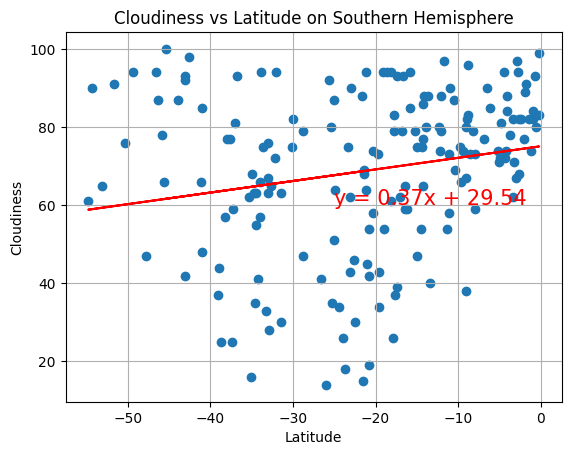

In [63]:
plt.scatter(x_values_s,y_values_sc)
plt.plot(x_values_s,regress_values_sc,"r-")

# Label plot and annotate the line equation
plt.title("Cloudiness vs Latitude on Southern Hemisphere")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq_s,(-25,60),fontsize=15,color="red")
plt.grid(True)

# Print r value
print(f"The r-value is: {rvalue**2}")


# Save the figure
plt.savefig("output_data/Fig10.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [91]:
# Northern Hemisphere

y_values_nw = northern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_n, y_values_nw)

regress_values_nw = x_values_n * slope + intercept
print(regress_values_nw)

City_ID
0      3.902042
1      3.679430
2      3.681648
4      3.320830
6      3.815526
         ...   
569    3.773433
572    3.327171
573    3.648552
574    3.226014
576    3.281758
Name: Lat, Length: 401, dtype: float64


In [92]:
line_eq_nw = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq_nw)

y = 0.01x + 3.21


The r-value is: 0.006398329501550456


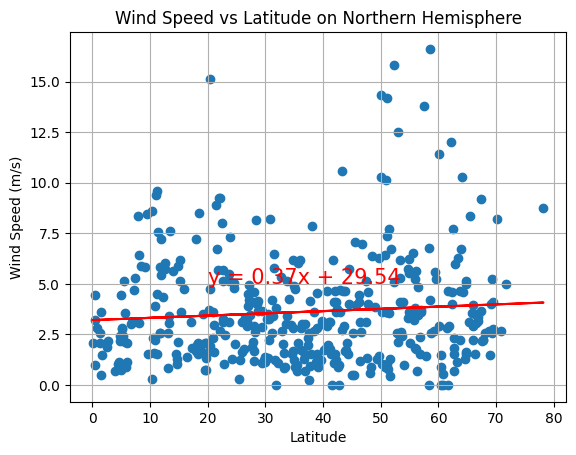

In [111]:
plt.scatter(x_values_n,y_values_nw)
plt.plot(x_values_n,regress_values_nw,"r-")

# Label plot and annotate the line equation
plt.title("Wind Speed vs Latitude on Northern Hemisphere")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.annotate(line_eq_s,(20,5),fontsize=15,color="red")
plt.grid(True)

# Print r value
print(f"The r-value is: {rvalue**2}")


# Save the figure
plt.savefig("output_data/Fig11.png")

# Show plot
plt.show()

In [112]:
# Southern Hemisphere

y_values_sw = southern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_s, y_values_sw)

regress_values_sw = x_values_s * slope + intercept
print(regress_values_sw)

City_ID
3      4.200491
5      3.604724
7      4.367941
9      4.303297
10     4.156324
         ...   
559    3.892550
565    3.668726
570    3.993051
571    3.261111
575    3.548629
Name: Lat, Length: 176, dtype: float64


In [113]:
line_eq_sw = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq_sw)

y = -0.03x + 2.96


The r-value is: 0.028984694539965484


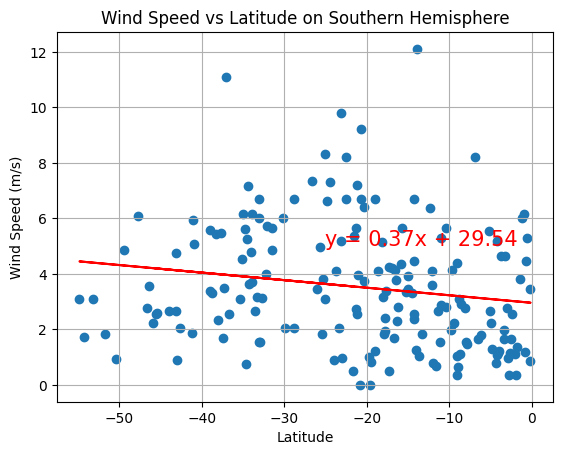

In [122]:
plt.scatter(x_values_s,y_values_sw)
plt.plot(x_values_s,regress_values_sw,"r-")

# Label plot and annotate the line equation
plt.title("Wind Speed vs Latitude on Southern Hemisphere")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.annotate(line_eq_s,(-25,5),fontsize=15,color="red")
plt.grid(True)

# Print r value
print(f"The r-value is: {rvalue**2}")


# Save the figure
plt.savefig("output_data/Fig12.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** Cloudiness has tendency to increase in Norther hemisphere when moving away from the equator. And decrease for Southern hemisphere. However, both show a variety of levels of cloudiness in different latitudes without clear indication.
Wind speed stay pretty consistent through Northern hemisphere at about 4 m/s or less. In southern, wind speed slows down from approx. 4 m/s as we approach equator. Yet, there is a spike of wind speed between lats -30 and -20. Which somewhat corresponds with the spike of cloudiness in the same lats for Southern hemisphere.
